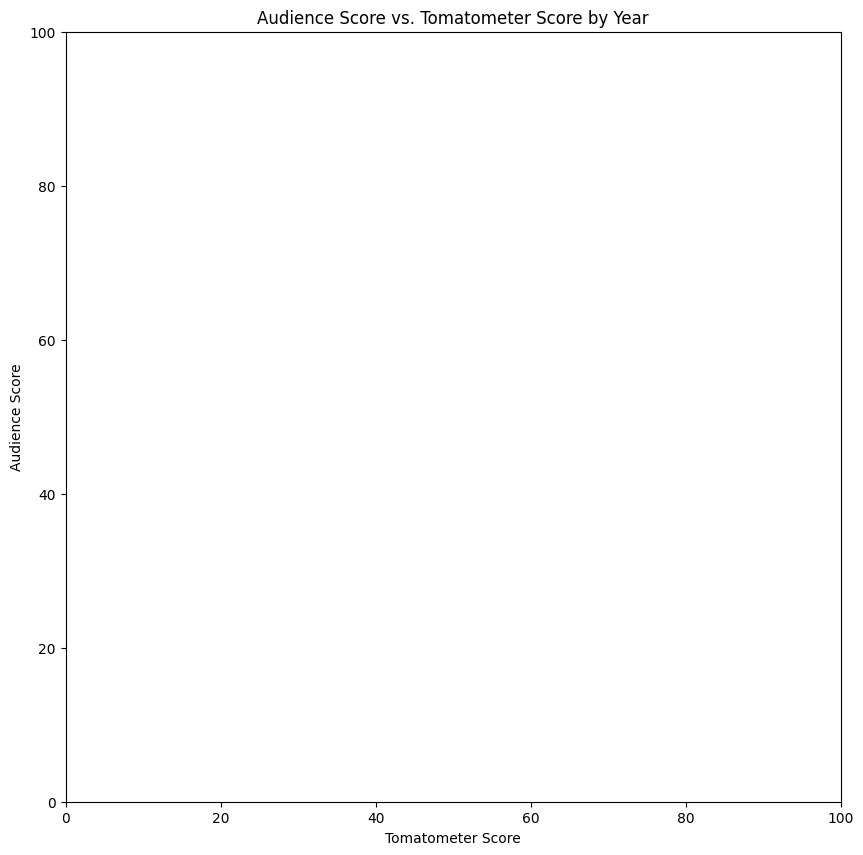

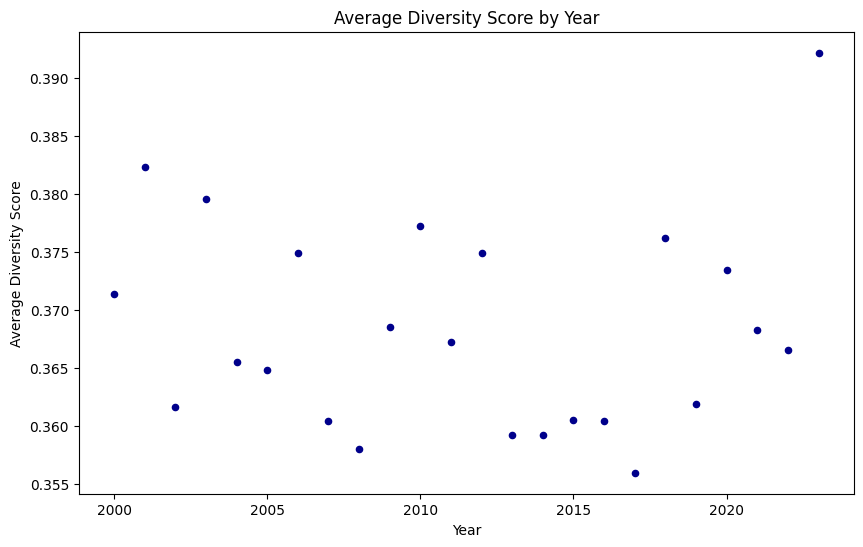

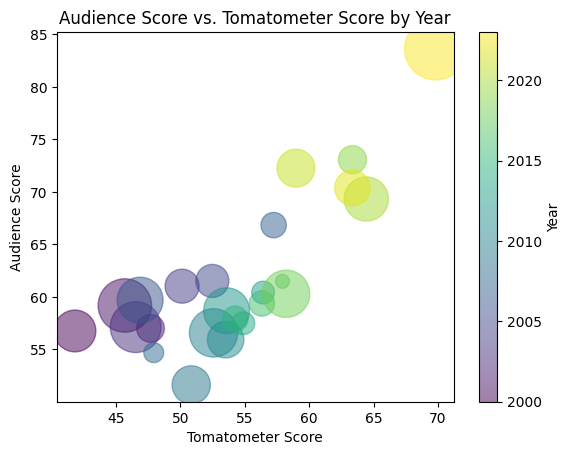

In [2]:
# First, we will convert the provided CSV data into a pandas DataFrame.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Convert the CSV data into a DataFrame
data = pd.read_csv('data_with_diversity.csv')

yearly_data = data.groupby('year').agg({
    'diversity_score': 'mean',
    'tomatometer': 'mean',
    'audience_score': 'mean'
}).reset_index()

# Make bubble chart with the diversity score as the radius of the bubble
# and the average audience score as the y-axis and the average tomatometer
# score as the x-axis. The color of the bubble will be determined by the
# year of the movie.

# Set the size of the figure
plt.figure(figsize=(10, 10))

# Set the x and y axis limits
plt.xlim(0, 100)
plt.ylim(0, 100)

# Set the x and y axis labels
plt.xlabel('Tomatometer Score')
plt.ylabel('Audience Score')

# Set the title of the chart
plt.title('Audience Score vs. Tomatometer Score by Year')

#print average diversity scores per year and plot the number
yearly_data.plot(kind='scatter', x='year', y='diversity_score', figsize=(10, 6), color='darkblue')
plt.title('Average Diversity Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Diversity Score')
plt.show()



# Set the size of the bubbles based on diversity score, but scale it up as it is just between 0.15 to 0.35
# Set the size of the bubbles
min_size = 100
max_size = 2000
min_score = yearly_data['diversity_score'].min()
max_score = yearly_data['diversity_score'].max()
yearly_data['bubble_area'] = yearly_data.apply(
    lambda row: min_size + (row['diversity_score'] - min_score) / (max_score - min_score) * (max_size - min_size),
    axis=1
)






# Set the color of the bubbles
colors = yearly_data['year']

# Create the scatter plot
plt.scatter(
    x=yearly_data['tomatometer'],
    y=yearly_data['audience_score'],
    s=yearly_data['bubble_area'],
    c=colors,
    alpha=0.5,
    cmap='viridis'
)

# Add a color bar
cbar = plt.colorbar()
cbar.set_label('Year')

#add labels
plt.xlabel('Tomatometer Score')
plt.ylabel('Audience Score')

# Add a title
plt.title('Audience Score vs. Tomatometer Score by Year')





# Show the figure
plt.show()




In [5]:
df = pd.read_csv('Data/Final/Ethnicity/cast_ethnicity.csv')  # Replace with your actual file path

def assign_race(row):
    # Exclude '2PRACE' and 'Name' from the row and find the race with the highest probability
    filtered_row = row.drop(labels=['2PRACE', 'Name'])
    return filtered_row.idxmax()

# Assign each actor their most probable race
df['Assigned Race'] = df.apply(assign_race, axis=1)

# Calculate the proportion of each ethnic group
ethnic_group_proportions = df['Assigned Race'].value_counts(normalize=True)
print(ethnic_group_proportions)


Assigned Race
White       0.888341
API         0.053843
Hispanic    0.045862
Black       0.011748
AIAN        0.000206
Name: proportion, dtype: float64


KeyError: 'Year'